In [63]:
import pandas as pd #Import pandas library for data manipulation
import matplotlib.pyplot as plt #Import matplotlib for plotting
%matplotlib inline
import scipy.stats as stats
import numpy as np

# Question 1

In [64]:
energyIntake = pd.read_csv('./Data-Files/daily_energy_intake.csv') #Read the energy intake data from CSV file
energyIntake.head() #Display the first few rows of the dataframe

,Energy Intake
0,5260
1,5470
2,5640
3,6180
4,6390


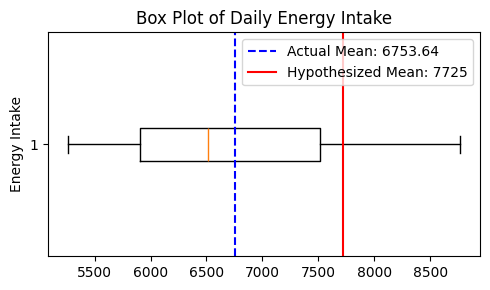

In [65]:
plt.figure(figsize=(5, 3))
plt.boxplot(energyIntake['Energy Intake'], vert=False) #Create a box plot for the energy intake data
plt.title('Box Plot of Daily Energy Intake') #Set the title of the plot
plt.ylabel('Energy Intake') #Set the y-axis label


#Calculate the actual mean of the data
actual_mean = sum(energyIntake['Energy Intake']) / len(energyIntake['Energy Intake']) 
# Add actual mean line
plt.axvline(actual_mean, color='blue', linestyle='--', label=f'Actual Mean: {actual_mean:.2f}')


# Add hypothesized mean line
hypothesized_mean = 7725
plt.axvline(hypothesized_mean, color='red', linestyle='-', label=f'Hypothesized Mean: {hypothesized_mean}')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()

plt.show() #Display the plot

To know for sure that the data is normally distributed, we need to plot a quantile quantile plot.

If the quantile quantile plot is approximately a straight line then we can say that the data is normally distributed.

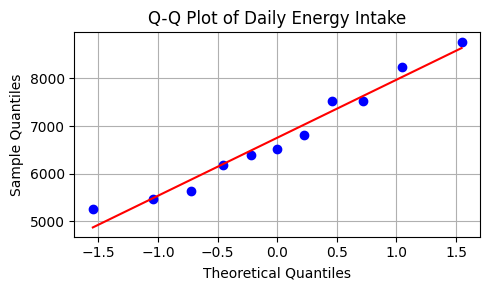

In [66]:

plt.figure(figsize=(5, 3))
stats.probplot(energyIntake['Energy Intake'], dist="norm", plot=plt) #Generating a quantile-quantile plot with a normal distribution
plt.title("Q-Q Plot of Daily Energy Intake") 
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent clipping of labels
plt.show()


**The Data is linear meaning it approximately normally distributed**

_Since we are asked to determine whether the data deviates systematically from the hypothesized mean of 7725_

_A two tail test would be appropriate because we are determing any difference in the hypothesized mean_

In [67]:
sample_mean = energyIntake['Energy Intake'].mean() #Calculate the sample mean using pandas
sample_std = energyIntake['Energy Intake'].std()  #Calculate the sample standard deviation using pandas
n = len(energyIntake['Energy Intake']) #Get the number of samples in the data

standard_error = sample_std / (n ** 0.5) #Calculate the standard error of the mean

t_statistic = (sample_mean - hypothesized_mean) / standard_error #Calculate the t-statistic 
degrees_of_freedom = n - 1 #Calculate the degrees of freedom 


print(f"Sample Mean: {sample_mean:.2f} kJ")
print(f"Sample Standard Deviation: {sample_std:.2f} kJ")
print(f"Sample Size (n): {n}")
print(f"Standard Error: {standard_error:.2f}")
print(f"T-Statistic: {t_statistic:.4f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")

Sample Mean: 6753.64 kJ
Sample Standard Deviation: 1142.12 kJ
Sample Size (n): 11
Standard Error: 344.36
T-Statistic: -2.8208
Degrees of Freedom: 10


In [68]:
p_val = stats.t.sf(abs(t_statistic), degrees_of_freedom)*2 #calculate the 2-tailed p-value from the t-statistic and degrees of freedom
#stats.t.cdf is only correct if the t-statistic is negative
print(f"P-Value: {p_val:.4f}")

P-Value: 0.0181


**The null hypothesis is rejected because a p-value of 0.0181 is small. this gives strong evidence against the null hypothesis**

# Question 2


#### CO2 Emmisions per Capita (2013)

In [69]:
co2_emissions = pd.read_csv('./Data-Files/CO2_Emissions.csv')


co2_2023 = co2_emissions[['Country Name', 'Country Code', '2023']]
co2_2023.columns = ['Country', 'Code', 'CO2_Emissions_2023']  # Rename columns

co2_2023.head()

,Country,Code,CO2_Emissions_2023
0,Aruba,ABW,4.936708
1,Africa Eastern and Southern,AFE,0.784641
2,Afghanistan,AFG,0.210043
3,Africa Western and Central,AFW,0.482217
4,Angola,AGO,0.768163


In [70]:
# Identify missing values in the 2023 CO2 emissions data
co2_2023[co2_2023['CO2_Emissions_2023'].isna()]

,Country,Code,CO2_Emissions_2023
6,Andorra,AND,NaN
38,Channel Islands,CHI,NaN
51,Curacao,CUW,NaN
108,Isle of Man,IMN,NaN
110,Not classified,INX,NaN
137,Liechtenstein,LIE,NaN
147,St. Martin (French part),MAF,NaN
149,Monaco,MCO,NaN
162,Montenegro,MNE,NaN
196,West Bank and Gaza,PSE,NaN


**Missing Data**

We cannot interpolate the null values and neither can we replace them with the mean. This is because the co2 emissions data are independent on the basis of country. additionally many other factors play a role in determining the amount of co2 emissions produced by a country. These factors have not been provided. Hence to deal with Missing data, we shall drop the null data objects.

In [71]:
co2_2023 = co2_2023.dropna(subset=['CO2_Emissions_2023'])

co2_2023.head()

,Country,Code,CO2_Emissions_2023
0,Aruba,ABW,4.936708
1,Africa Eastern and Southern,AFE,0.784641
2,Afghanistan,AFG,0.210043
3,Africa Western and Central,AFW,0.482217
4,Angola,AGO,0.768163


In [72]:
#drop rows which are not countries but they are regions or income groups
country_names_to_drop = [
  "Africa Eastern and Southern",
  "Africa Western and Central",
  "American Samoa",
  "Arab World",
  "Aruba",
  "Bermuda",
  "British Virgin Islands",
  "Caribbean small states",
  "Cayman Islands",
  "Central Europe and the Baltics",
  "Channel Islands",
  "Curacao",
  "Early-demographic dividend",
  "East Asia & Pacific",
  "East Asia & Pacific (IDA & IBRD countries)",
  "East Asia & Pacific (excluding high income)",
  "Euro area",
  "Europe & Central Asia",
  "Europe & Central Asia (IDA & IBRD countries)",
  "Europe & Central Asia (excluding high income)",
  "European Union",
  "Faroe Islands",
  "Fragile and conflict affected situations",
  "French Polynesia",
  "Gibraltar",
  "Greenland",
  "Guam",
  "Heavily indebted poor countries (HIPC)",
  "High income",
  "Hong Kong SAR, China",
  "IBRD only",
  "IDA & IBRD total",
  "IDA blend",
  "IDA only",
  "IDA total",
  "Isle of Man",
  "Kosovo",
  "Late-demographic dividend",
  "Latin America & Caribbean",
  "Latin America & Caribbean (excluding high income)",
  "Latin America & the Caribbean (IDA & IBRD countries)",
  "Least developed countries: UN classification",
  "Low & middle income",
  "Low income",
  "Lower middle income",
  "Macao SAR, China",
  "Middle East, North Africa, Afghanistan & Pakistan",
  "Middle East, North Africa, Afghanistan & Pakistan (IDA & IBRD)",
  "Middle East, North Africa, Afghanistan & Pakistan (excluding high income)",
  "Middle income",
  "New Caledonia",
  "North America",
  "Northern Mariana Islands",
  "Not classified",
  "OECD members",
  "Other small states",
  "Pacific island small states",
  "Post-demographic dividend",
  "Pre-demographic dividend",
  "Puerto Rico (US)",
  "Sint Maarten (Dutch part)",
  "Small states",
  "South Asia",
  "South Asia (IDA & IBRD)",
  "St. Martin (French part)",
  "Sub-Saharan Africa",
  "Sub-Saharan Africa (IDA & IBRD countries)",
  "Sub-Saharan Africa (excluding high income)",
  "Turks and Caicos Islands",
  "Upper middle income",
  "Virgin Islands (U.S.)",
  "West Bank and Gaza",
  "World"
]

#drop these rows from CO2 emissions per capita
co2_2023 = co2_2023.drop(co2_2023[co2_2023['Country'].isin(country_names_to_drop)].index)
co2_2023.head()

,Country,Code,CO2_Emissions_2023
2,Afghanistan,AFG,0.210043
4,Angola,AGO,0.768163
5,Albania,ALB,1.672195
8,United Arab Emirates,ARE,19.648626
9,Argentina,ARG,4.035680


In [73]:
mean_co2 = co2_2023['CO2_Emissions_2023'].mean() #Calculate the mean of the CO2 emissions data
std_co2 = co2_2023['CO2_Emissions_2023'].std()  #Calculate the standard deviation of the CO2 emissions data
median_co2 = co2_2023['CO2_Emissions_2023'].median() #Calculate the median of the CO2 emissions data
p_5_co2 = co2_2023['CO2_Emissions_2023'].quantile(0.05) #Calculate the 5th percentile of the CO2 emissions data
p_25_co2 = co2_2023['CO2_Emissions_2023'].quantile(0.25) #Calculate the 25th percentile of the CO2 emissions data
p_75_co2 = co2_2023['CO2_Emissions_2023'].quantile(0.75) #Calculate the 75th percentile of the CO2 emissions data
p_95_co2 = co2_2023['CO2_Emissions_2023'].quantile(0.95) #Calculate the 95th percentile of the CO2 emissions data

# Create a dictionary to hold the statistic names and their calculated values
summary_dict = {
    'Statistic': [
        'Mean', 'Standard Deviation', 'Median',
        '5th Percentile', '25th Percentile',
        '75th Percentile', '95th Percentile'
    ],
    'Value': [
        mean_co2, std_co2, median_co2,
        p_5_co2, p_25_co2,
        p_75_co2, p_95_co2
    ]
}

# Create the pandas DataFrame
summary_df = pd.DataFrame(summary_dict)
summary_df.head(7)

,Statistic,Value
0,Mean,4.525390
1,Standard Deviation,7.968472
2,Median,2.476993
3,5th Percentile,0.120229
4,25th Percentile,0.716045
5,75th Percentile,5.168018
6,95th Percentile,14.378026


#### Primary Completion Rate (2013)

In [74]:
primary_completion = pd.read_csv('./Data-Files/Primary_completion_rate.csv')

PC_2023 = primary_completion[['Country Name', 'Country Code', '2023']]
PC_2023.columns = ['Country', 'Code', 'Primary_Completion_2023']  # Rename columns

#drop the rows which are not countries
PC_2023 = PC_2023.drop(PC_2023[PC_2023['Country'].isin(country_names_to_drop)].index)
PC_2023.head()


,Country,Code,Primary_Completion_2023
2,Afghanistan,AFG,NaN
4,Angola,AGO,NaN
5,Albania,ALB,95.135147
6,Andorra,AND,69.333328
8,United Arab Emirates,ARE,99.173790


In [75]:
NAN_count = PC_2023['Primary_Completion_2023'].isna().sum() #Countine the number of missing values
dataset_size = PC_2023['Primary_Completion_2023'].size

print(f"Number of missing values in Primary Completion Rate 2023: {NAN_count}")
print(f"Total number of entries in Primary Completion Rate 2023: {dataset_size}")

Number of missing values in Primary Completion Rate 2023: 112
Total number of entries in Primary Completion Rate 2023: 193


**Missing Data**

It is clear that over 50% of the data is missing, hence in this scenario, it would be more appropriate to populate the missing values with the mean of the present data


In [76]:
PC_2023.loc[:, 'Primary_Completion_2023'] = PC_2023['Primary_Completion_2023'].fillna(PC_2023['Primary_Completion_2023'].mean())
PC_2023.head()

,Country,Code,Primary_Completion_2023
2,Afghanistan,AFG,88.295481
4,Angola,AGO,88.295481
5,Albania,ALB,95.135147
6,Andorra,AND,69.333328
8,United Arab Emirates,ARE,99.173790


In [77]:
mean_PC = PC_2023['Primary_Completion_2023'].mean() #Calculate the mean of the Primary Completion Rate data
std_PC = PC_2023['Primary_Completion_2023'].std()  #Calculate the standard deviation of the Primary Completion Rate data
median_PC = PC_2023['Primary_Completion_2023'].median() #Calculate the median of the Primary Completion Rate data
p_5_PC = PC_2023['Primary_Completion_2023'].quantile(0.05) #Calculate the 5th percentile of the Primary Completion Rate data
p_25_PC = PC_2023['Primary_Completion_2023'].quantile(0.25) #Calculate the 25th percentile of the Primary Completion Rate data
p_75_PC = PC_2023['Primary_Completion_2023'].quantile(0.75) #Calculate the 75th percentile of the Primary Completion Rate data
p_95_PC = PC_2023['Primary_Completion_2023'].quantile(0.95) #Calculate the 95th percentile of the Primary Completion Rate data  

summary_dict_PC = {
    'Statistic': [
        'Mean', 'Standard Deviation', 'Median', '5th Percentile', '25th Percentile', '75th Percentile', '95th Percentile']
    , 'Value': [
        mean_PC, std_PC, median_PC, p_5_PC, p_25_PC, p_75_PC, p_95_PC]
}

summary_df_PC = pd.DataFrame(summary_dict_PC)
summary_df_PC.head(7)

,Statistic,Value
0,Mean,88.295481
1,Standard Deviation,10.067225
2,Median,88.295481
3,5th Percentile,68.390250
4,25th Percentile,88.295481
5,75th Percentile,89.957390
6,95th Percentile,104.340414


# Question 3

In [78]:
GDP = pd.read_csv('./Data-Files/GDP_Per_Capita.csv') #import the GDP per capita data as a pandas dataframe
GDP = GDP.drop(columns=['Indicator Name', 'Indicator Code']) #drop unnecessary columns
GDP.head() #display the first few rows of the dataframe

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27458.225330,27441.529660,28440.051960,30082.127640,31096.205070,22855.932320,27200.061080,30559.533530,33984.790620,NaN
1,Africa Eastern and Southern,AFE,186.121835,186.941781,197.402402,225.440494,208.999748,226.876513,240.955232,243.817323,...,1479.615260,1329.807285,1520.212231,1538.901679,1493.817938,1344.103210,1522.393346,1628.318944,1568.159891,1673.841139
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,565.569730,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN
3,Africa Western and Central,AFW,121.939925,127.454189,133.827044,139.008291,148.549379,155.565216,162.110768,144.943480,...,1860.727694,1630.039447,1574.230560,1720.140280,1798.340685,1680.039332,1765.954788,1796.668633,1599.392983,1284.154441
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3213.902611,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2309.534130,2122.083690


In [79]:
weight = pd.read_csv('./Data-Files/Prevelance_of_underweight_weight.csv') #import the prevalence of underweight data as a pandas dataframe
weight = weight.drop(columns=['Indicator Name', 'Indicator Code']) #drop unnecessary columns
weight.head() #display the first few rows of the dataframe

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,19.1,NaN,NaN,NaN,18.4,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Missing Data**

It is important to now find out how many attributed have missing data


In [80]:
number_of_missing_values_1960 = weight['1960'].isna().sum() #count the number of missing values in the 1960 column
total_rows = weight['1960'].size #get the total number of entries or rows in the 1960 column

print(f"Number of missing values in 1960: {number_of_missing_values_1960}")
print(f"Total number of entries in 1960: {total_rows}")

Number of missing values in 1960: 266
Total number of entries in 1960: 266


**We now observe that 1960 has no data for the Prevelance of underweight weight**

we cannot perform interpolation or fill the missing values with the sample mean. we have no choice but to drop all attributes which have all fields missing data.

In [81]:
# Count the total number of missing values for each attribute
missing_counts = weight.isnull().sum()

# Find the columns where the number of missing values equals the total number of rows
fully_missing_attributes = missing_counts[missing_counts == total_rows]

print("Attributes full of missing data:")
print(fully_missing_attributes)

Attributes full of missing data:
1960    266
1961    266
1962    266
1963    266
1964    266
1965    266
1966    266
1967    266
1968    266
1969    266
1970    266
1971    266
1972    266
1973    266
1974    266
1975    266
1976    266
1977    266
1978    266
1979    266
1980    266
1981    266
1982    266
1984    266
dtype: int64


Once we know which exact attributes are full of missing data, we can then proceed to drop them from the dataframe 

In [82]:
missing_attributes_index = fully_missing_attributes.index.tolist() #get a list of the column names which are full of missing data

weight = weight.drop(columns=missing_attributes_index) #drop all the columns which are full of missing data
weight.head()

,Country Name,Country Code,1983,1985,1986,1987,1988,1989,1990,1991,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,19.1,NaN,NaN,NaN,18.4,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Once we have dropped the missing attributes. we must similarly drop the same attributes in the GDP Per capita dataframe because we will be plotting the two dataframes together.

In [83]:
GDP = GDP.drop(columns=missing_attributes_index) #drop the same columns from the GDP dataframe
GDP.head()

,Country Name,Country Code,1983,1985,1986,1987,1988,1989,1990,1991,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,NaN,NaN,6767.559229,8244.045660,10056.261390,11507.217150,12187.536360,13233.990520,...,27458.225330,27441.529660,28440.051960,30082.127640,31096.205070,22855.932320,27200.061080,30559.533530,33984.790620,NaN
1,Africa Eastern and Southern,AFE,732.588724,554.439146,578.603956,665.119756,704.466222,728.549337,822.793868,864.563865,...,1479.615260,1329.807285,1520.212231,1538.901679,1493.817938,1344.103210,1522.393346,1628.318944,1568.159891,1673.841139
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,565.569730,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN
3,Africa Western and Central,AFW,872.832679,753.799755,581.390713,581.523802,560.380582,509.326734,590.321435,603.878910,...,1860.727694,1630.039447,1574.230560,1720.140280,1798.340685,1680.039332,1765.954788,1796.668633,1599.392983,1284.154441
4,Angola,AGO,636.832811,772.468833,697.526602,770.101140,807.439628,907.747893,965.866840,881.919488,...,3213.902611,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2309.534130,2122.083690


There are countries which have alot of missing data throughout the years. This is a problem because we will be unable to find the appropriate mean underweight weight to replace the missing data.

Hence we shall drop countries which do not have at least 11 data points of which we can calculate the mean

In [84]:
total_columns = weight.shape[1] #get the total number of columns remaining in the weight dataframe
print(f"Total number of columns after dropping fully missing attributes: {total_columns}")
#There are 43 columns remaining.
#If we subract 2 (Country Name and Country Code), we have 41 years of data remaining.

missing_rows = weight.isnull().sum(axis = 1) #get the number of missing values for each country (row)

missing_rows = missing_rows[missing_rows >= 30] #We want to drop countries which have more than 30 missing values (i.e. less than 11 data points remaining)

print(f"Number of rows with more than 30 missing values: {len(missing_rows)}")

Total number of columns after dropping fully missing attributes: 43
Number of rows with more than 30 missing values: 228


In [85]:
missing_rows_index = missing_rows.index.tolist() #get a list of the row indices which have more than 30 missing values

weight = weight.drop(index = missing_rows_index) #Drop the countries with more than 30 missing values
GDP = GDP.drop(index = missing_rows_index) #Drop the same countries from the GDP dataframe

print("Number of rows remaining after dropping countries with more than 30 missing values:")
print(f"Prevelance underweight weight: {weight.shape[0]}")
print(f"GDP Per Capita: {GDP.shape[0]}")

Number of rows remaining after dropping countries with more than 30 missing values:
Prevelance underweight weight: 38
GDP Per Capita: 38


Now that we have gotten rid of rows that have too many missing data points, we can then replace the missing country data with the mean weight of each country. This is beacuse there is little variation in a country's underweight weight over the years. 

In [86]:
country_means = weight.mean(axis=1, skipna=True, numeric_only=True) #Calculate the mean for each country across all years, ignoring NaN values

#loop throught each row to fill missing values with the country's mean
for index, row in weight.iterrows():
    # Check if there are any missing values in the row's numeric columns
    # We only want to fill NaNs in numeric columns
    if row.isnull().any():
        # Get the mean for the current row
        mean_value = country_means.loc[index]
        # Fill the missing values in the current row with its mean
        weight.loc[index] = row.fillna(mean_value)

weight.head()

,Country Name,Country Code,1983,1985,1986,1987,1988,1989,1990,1991,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
16,Burundi,BDI,29.933333,29.933333,29.933333,30.400000,29.933333,29.933333,29.933333,29.933333,...,29.933333,29.300000,29.933333,29.600000,27.000000,27.700000,29.933333,27.600000,28.000000,28.300000
19,Burkina Faso,BFA,21.513333,21.513333,21.513333,21.513333,21.513333,21.513333,21.513333,21.513333,...,22.800000,18.900000,16.200000,17.700000,16.400000,12.700000,16.900000,21.513333,21.513333,21.513333
20,Bangladesh,BGD,43.925926,43.925926,66.800000,43.925926,43.925926,43.925926,61.500000,61.200000,...,31.000000,43.925926,43.925926,21.900000,22.600000,43.925926,43.925926,21.700000,43.925926,43.925926
39,Chile,CHL,0.746667,0.746667,2.200000,0.746667,0.746667,0.746667,0.746667,0.746667,...,0.746667,0.746667,0.746667,0.746667,0.746667,0.746667,0.746667,0.746667,0.746667,0.746667
40,China,CHN,7.900000,7.900000,7.900000,18.700000,7.900000,7.900000,12.600000,7.900000,...,7.900000,7.900000,7.900000,7.900000,7.900000,7.900000,7.900000,7.900000,7.900000,7.900000


In [87]:
GDP_means = GDP.mean(axis=1, skipna=True, numeric_only=True) #Calculate the mean for each country across all years, ignoring NaN values

#loop throught each row to fill missing values with the country's mean
for index, row in GDP.iterrows():
    # Check if there are any missing values in the row's numeric columns
    # We only want to fill NaNs in numeric columns
    if row.isnull().any():
        # Get the mean for the current row
        mean_value = GDP_means.loc[index]
        # Fill the missing values in the current row with its mean
        GDP.loc[index] = row.fillna(mean_value)

GDP.head()

,Country Name,Country Code,1983,1985,1986,1987,1988,1989,1990,1991,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
16,Burundi,BDI,225.209524,228.440543,234.281245,215.608312,201.740401,203.578944,202.629446,204.668258,...,280.966831,235.286205,236.694473,224.899392,210.236494,210.008140,214.091455,250.634225,192.074305,153.930218
19,Burkina Faso,BFA,211.925740,194.063226,247.459135,280.218092,301.129215,293.188704,338.593759,333.706055,...,630.124751,663.742365,709.091536,777.465619,764.853078,825.237039,895.535288,836.118305,882.689810,987.321378
20,Bangladesh,BGD,184.706773,222.220180,212.148994,231.499584,247.901466,263.005721,283.053737,272.064949,...,1224.386477,1649.283809,1811.082217,1965.243727,2129.798970,2248.850788,2482.849178,2716.485928,2551.017738,2593.416074
39,Chile,CHL,1715.403457,1446.806046,1524.978095,1767.413897,2013.539878,2277.847643,2487.768297,2798.342624,...,13433.920300,13649.852050,14879.908620,15659.480870,14495.716720,13114.815470,16206.832550,15405.616580,17067.036480,16709.889400
40,China,CHN,225.865347,295.007446,282.445603,252.256760,284.023573,311.429461,318.503354,334.130288,...,8175.332851,8254.868593,8979.676527,10085.663810,10342.900950,10627.463800,12887.435720,12970.605640,12951.178240,13303.148150


#### Prevalence of underweight vs GDP per capita for all available countries

In [88]:
def prepare_data(df, value_name):
    # Identify the year columns
    year_cols = []
    for col in df.columns:
        # Check if the column name is made entirely of digits
        if col.isdigit():
            # If it is, add it to our list
            year_cols.append(col)
    
    # Melt the DataFrame to long format i.e reducing the number of columns to just 4 columns
    df_long = df.melt(
        id_vars=['Country Name', 'Country Code'],
        value_vars=year_cols,
        var_name='Year',
        value_name=value_name
    )
    # Convert 'Year' to integer type for plotting purposes
    df_long['Year'] = pd.to_numeric(df_long['Year'])
    return df_long

gdp_long = prepare_data(GDP, 'GDP per Capita')
gdp_long


,Country Name,Country Code,Year,GDP per Capita
0,Burundi,BDI,1983,225.209524
1,Burkina Faso,BFA,1983,211.925740
2,Bangladesh,BGD,1983,184.706773
3,Chile,CHL,1983,1715.403457
4,China,CHN,1983,225.865347
...,...,...,...,...
1553,Upper middle income,UMC,2024,10961.818450
1554,"Venezuela, RB",VEN,2024,5831.014664
1555,Viet Nam,VNM,2024,4717.290287
1556,World,WLD,2024,13673.003960


In [89]:
weight_long = prepare_data(weight, 'Underweight Prevalence')
weight_long



,Country Name,Country Code,Year,Underweight Prevalence
0,Burundi,BDI,1983,29.933333
1,Burkina Faso,BFA,1983,21.513333
2,Bangladesh,BGD,1983,43.925926
3,Chile,CHL,1983,0.746667
4,China,CHN,1983,7.900000
...,...,...,...,...
1553,Upper middle income,UMC,2024,2.560000
1554,"Venezuela, RB",VEN,2024,4.242857
1555,Viet Nam,VNM,2024,20.722222
1556,World,WLD,2024,12.180000


In [90]:
# Merge the two datasets on common keys, and use suffixes to handle duplicate column names
merged_df = pd.merge(gdp_long, weight_long, on=['Country Code', 'Year'], suffixes=('_gdp', '_weight'))

# Now, we need to create a mapping from Country Code to Country Name.

#create a list of country codes to drop these are actually not countries but regions or income groups
rows_to_drop = ['EAS', 'ECS', 'HIC', 'LIC', 'LCN', 'LMC', 'LMY', 'MEA', 'MIC', 'NAC', 'SAS', 'SSF', 'UMC', 'WLD']

# Drop rows where 'Country Code' is in the rows_to_drop list
merged_df = merged_df.drop(merged_df[merged_df['Country Code'].isin(rows_to_drop)].index)

country_map = merged_df.set_index('Country Code')['Country Name_gdp'].drop_duplicates()

merged_df

,Country Name_gdp,Country Code,Year,GDP per Capita,Country Name_weight,Underweight Prevalence
0,Burundi,BDI,1983,225.209524,Burundi,29.933333
1,Burkina Faso,BFA,1983,211.925740,Burkina Faso,21.513333
2,Bangladesh,BGD,1983,184.706773,Bangladesh,43.925926
3,Chile,CHL,1983,1715.403457,Chile,0.746667
4,China,CHN,1983,225.865347,China,7.900000
...,...,...,...,...,...,...
1551,Tanzania,TZA,2024,1185.745483,Tanzania,16.707692
1552,Uganda,UGA,2024,1072.713698,Uganda,13.392308
1554,"Venezuela, RB",VEN,2024,5831.014664,"Venezuela, RB",4.242857
1555,Viet Nam,VNM,2024,4717.290287,Viet Nam,20.722222


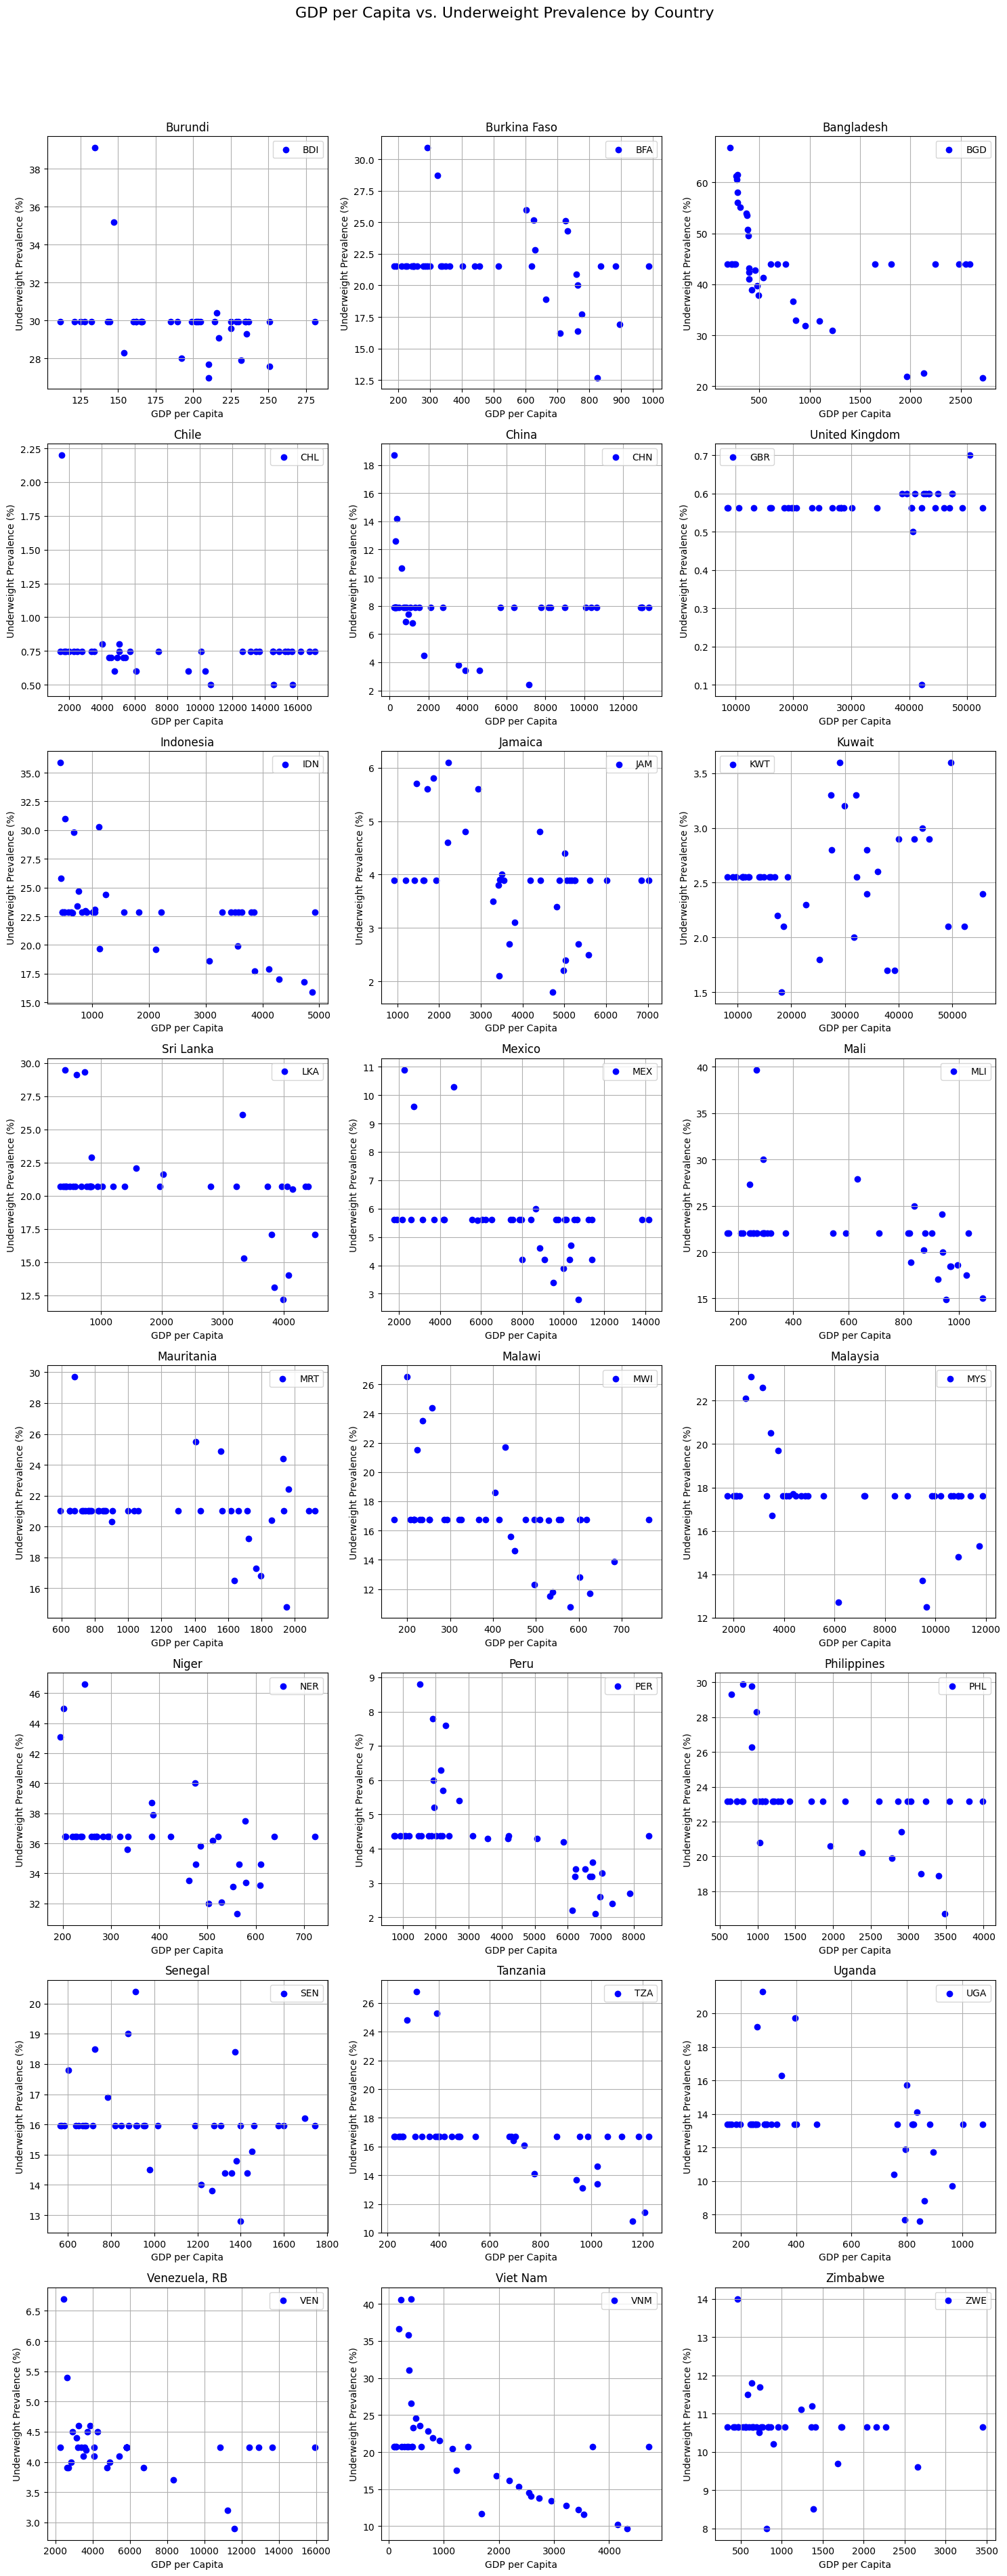

In [91]:
num_countries = len(country_map)
ncols = 3
nrows = int(np.ceil(num_countries / ncols))


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
fig.suptitle('GDP per Capita vs. Underweight Prevalence by Country', fontsize=16)
plt.subplots_adjust(top=0.9, hspace=0.4) 

axes_flat = axes.flatten()

# Loop through each country and plot its data
for i, country_code in enumerate(country_map.index):
    country_name = country_map.loc[country_code]
    
    country_data = merged_df[merged_df['Country Code'] == country_code]
    
    axes_flat[i].scatter(
        country_data['GDP per Capita'], 
        country_data['Underweight Prevalence'],
        label=country_code,
        color='blue'
    )
    
    axes_flat[i].set_title(country_name, fontsize=12)
    axes_flat[i].set_xlabel('GDP per Capita')
    axes_flat[i].set_ylabel('Underweight Prevalence (%)')
    
    axes_flat[i].legend()
    axes_flat[i].grid(True)

for j in range(num_countries, len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Prevalence of underweight vs GDP per capita for all Regions

In [92]:
merged_df_2 = pd.merge(gdp_long, weight_long, on=['Country Code', 'Year'])
merged_df_2 = merged_df_2.drop(columns=['Country Name_y'])
merged_df_2.columns = ['Country Name', 'Country Code', 'Year', 'GDP per Capita', 'Underweight Prevalence']
merged_df_2

,Country Name,Country Code,Year,GDP per Capita,Underweight Prevalence
0,Burundi,BDI,1983,225.209524,29.933333
1,Burkina Faso,BFA,1983,211.925740,21.513333
2,Bangladesh,BGD,1983,184.706773,43.925926
3,Chile,CHL,1983,1715.403457,0.746667
4,China,CHN,1983,225.865347,7.900000
...,...,...,...,...,...
1553,Upper middle income,UMC,2024,10961.818450,2.560000
1554,"Venezuela, RB",VEN,2024,5831.014664,4.242857
1555,Viet Nam,VNM,2024,4717.290287,20.722222
1556,World,WLD,2024,13673.003960,12.180000


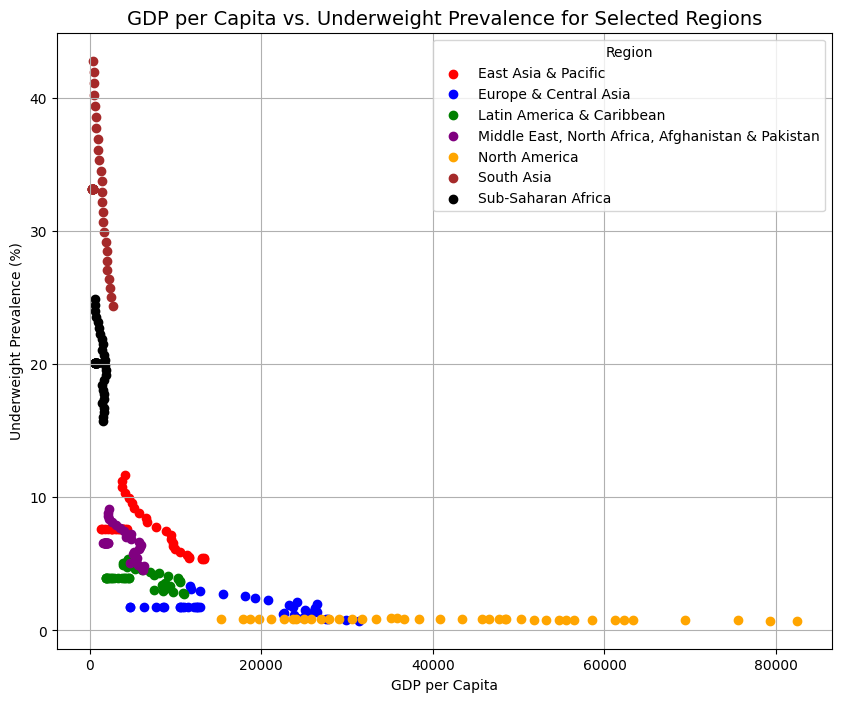

In [93]:
regions_to_plot = ['EAS', 'ECS', 'LCN', 'MEA', 'NAC', 'SAS', 'SSF']
filtered_df = merged_df_2[merged_df_2['Country Code'].isin(regions_to_plot)]

plt.figure(figsize=(10, 8))
plt.title('GDP per Capita vs. Underweight Prevalence for Selected Regions', fontsize=14)
plt.xlabel('GDP per Capita')
plt.ylabel('Underweight Prevalence (%)')
plt.grid(True)

# Define a list of colors for the different regions
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'black', 'skyblue']

# Loop through each region and plot it with a unique color
for i, country_code in enumerate(regions_to_plot):
    # Filter data for the current region
    region_data = filtered_df[filtered_df['Country Code'] == country_code]
    
    # Get the Region name for the label from the merged data
    region_name = region_data['Country Name'].iloc[0]
    
    # Plot the scatter points
    plt.scatter(
        region_data['GDP per Capita'],
        region_data['Underweight Prevalence'],
        label=region_name,
        color=colors[i]
    )

plt.legend(title='Region')
plt.show()


#### Prevalence of underweight vs GDP per capita for different income levels

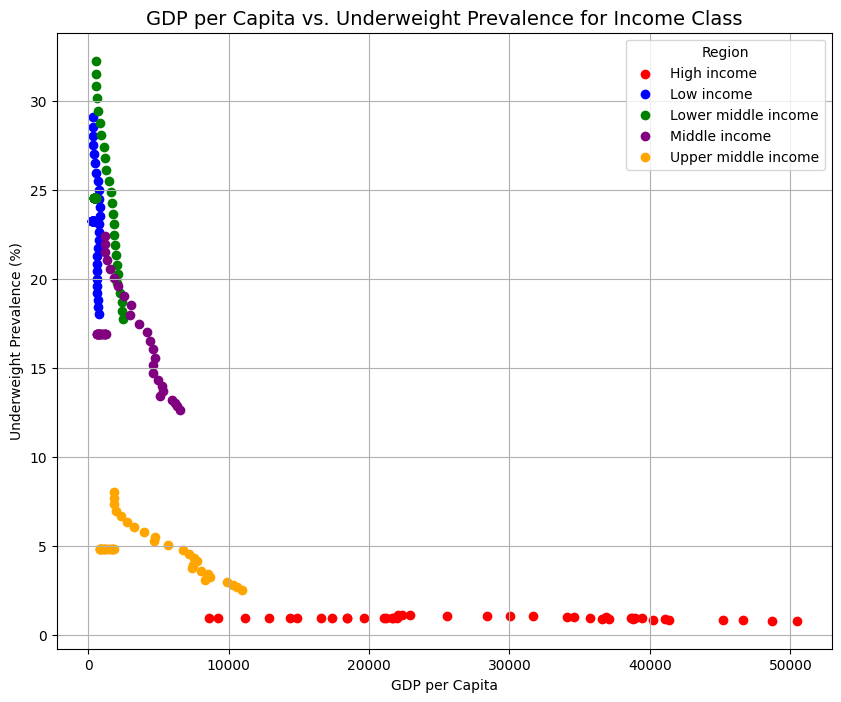

In [94]:
incomes_to_plot = ['HIC', 'LIC', 'LMC', 'MIC', 'UMC']

filtered_df_2 = merged_df_2[merged_df_2['Country Code'].isin(incomes_to_plot)]

plt.figure(figsize=(10, 8))
plt.title('GDP per Capita vs. Underweight Prevalence for Income Class', fontsize=14)
plt.xlabel('GDP per Capita')
plt.ylabel('Underweight Prevalence (%)')
plt.grid(True)

# Define a list of colors for the different regions
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Loop through each region and plot it with a unique color
for i, country_code in enumerate(incomes_to_plot):
    # Filter data for the current region
    income_data = filtered_df_2[filtered_df_2['Country Code'] == country_code]
    
    # Get the Region name for the label from the merged data
    income_name = income_data['Country Name'].iloc[0]
    
    # Plot the scatter points
    plt.scatter(
        income_data['GDP per Capita'],
        income_data['Underweight Prevalence'],
        label=income_name,
        color=colors[i]
    )

plt.legend(title='Region')
plt.show()


# Question 5

In [95]:
fertility = pd.read_csv('./Data-Files/Fertility_rate.csv') #import the fertility rate data as a pandas dataframe
fertility = fertility[['Country Name', 'Country Code', '2023']] #Keep only relevant columns
fertility.columns = ['Country', 'Code', 'Fertility_Rate_2023']  # Rename columns
fertility.head() #Display the first few rows of the dataframe

,Country,Code,Fertility_Rate_2023
0,Aruba,ABW,1.602000
1,Africa Eastern and Southern,AFE,4.223771
2,Afghanistan,AFG,4.840000
3,Africa Western and Central,AFW,4.497707
4,Angola,AGO,5.124000


In [96]:
GDP_international = pd.read_csv('./Data-Files/GDP_per_capita_current_international.csv')
GDP_international = GDP_international[['Country Name', 'Country Code', '2023']] #Keep only relevant columns
GDP_international.columns = ['Country', 'Code', 'GDP_per_capita_2023']  # Rename columns
GDP_international.head() #Display the first few rows of the dataframe

,Country,Code,GDP_per_capita_2023
0,Aruba,ABW,44967.344510
1,Africa Eastern and Southern,AFE,4352.490897
2,Afghanistan,AFG,2201.722907
3,Africa Western and Central,AFW,5408.013246
4,Angola,AGO,8046.817299


In [97]:
#drop rows which are not countries but they are regions or income groups
country_names_to_drop = [
  "Africa Eastern and Southern",
  "Africa Western and Central",
  "American Samoa",
  "Arab World",
  "Aruba",
  "Bermuda",
  "British Virgin Islands",
  "Caribbean small states",
  "Cayman Islands",
  "Central Europe and the Baltics",
  "Channel Islands",
  "Curacao",
  "Early-demographic dividend",
  "East Asia & Pacific",
  "East Asia & Pacific (IDA & IBRD countries)",
  "East Asia & Pacific (excluding high income)",
  "Euro area",
  "Europe & Central Asia",
  "Europe & Central Asia (IDA & IBRD countries)",
  "Europe & Central Asia (excluding high income)",
  "European Union",
  "Faroe Islands",
  "Fragile and conflict affected situations",
  "French Polynesia",
  "Gibraltar",
  "Greenland",
  "Guam",
  "Heavily indebted poor countries (HIPC)",
  "High income",
  "Hong Kong SAR, China",
  "IBRD only",
  "IDA & IBRD total",
  "IDA blend",
  "IDA only",
  "IDA total",
  "Isle of Man",
  "Kosovo",
  "Late-demographic dividend",
  "Latin America & Caribbean",
  "Latin America & Caribbean (excluding high income)",
  "Latin America & the Caribbean (IDA & IBRD countries)",
  "Least developed countries: UN classification",
  "Low & middle income",
  "Low income",
  "Lower middle income",
  "Macao SAR, China",
  "Middle East, North Africa, Afghanistan & Pakistan",
  "Middle East, North Africa, Afghanistan & Pakistan (IDA & IBRD)",
  "Middle East, North Africa, Afghanistan & Pakistan (excluding high income)",
  "Middle income",
  "New Caledonia",
  "North America",
  "Northern Mariana Islands",
  "Not classified",
  "OECD members",
  "Other small states",
  "Pacific island small states",
  "Post-demographic dividend",
  "Pre-demographic dividend",
  "Puerto Rico (US)",
  "Sint Maarten (Dutch part)",
  "Small states",
  "South Asia",
  "South Asia (IDA & IBRD)",
  "St. Martin (French part)",
  "Sub-Saharan Africa",
  "Sub-Saharan Africa (IDA & IBRD countries)",
  "Sub-Saharan Africa (excluding high income)",
  "Turks and Caicos Islands",
  "Upper middle income",
  "Virgin Islands (U.S.)",
  "West Bank and Gaza",
  "World"
]

#drop these rows from both fertility and GDP_international dataframes
GDP_international = GDP_international.drop(GDP_international[GDP_international['Country'].isin(country_names_to_drop)].index)
fertility = fertility.drop(fertility[fertility['Country'].isin(country_names_to_drop)].index)

#### Handling Missing Data

First step is to find out how many data points are missing from each dataset

In [98]:
GDP_missing_values = GDP_international['GDP_per_capita_2023'].isna().sum() #count the number of missing data points in the GDP per capita column
fertility_missing_values = fertility['Fertility_Rate_2023'].isna().sum() #count the number of missing data points in the Fertility rate column

print(f"Number of missing values in GDP per capita 2023: {GDP_missing_values}")
print(f"Number of missing values in Fertility Rate 2023: {fertility_missing_values}")

Number of missing values in GDP per capita 2023: 9
Number of missing values in Fertility Rate 2023: 0


We can see that only GDP per capita has missing data which are 9 in total. so we can drop the missing values because we cannot interpolate and neither can we use the mean to replace the missing values because each country has a completey different GDP per capita and the GDP of each country is independent of the others

In [99]:
fertility_gdp = pd.merge(fertility, GDP_international, on=['Country', 'Code']) 
fertility_gdp = fertility_gdp.dropna(subset=['GDP_per_capita_2023'])
fertility_gdp.head()

,Country,Code,Fertility_Rate_2023,GDP_per_capita_2023
0,Afghanistan,AFG,4.840,2201.722907
1,Angola,AGO,5.124,8046.817299
2,Albania,ALB,1.348,21259.797780
3,Andorra,AND,1.082,71730.668680
4,United Arab Emirates,ARE,1.200,76110.384840


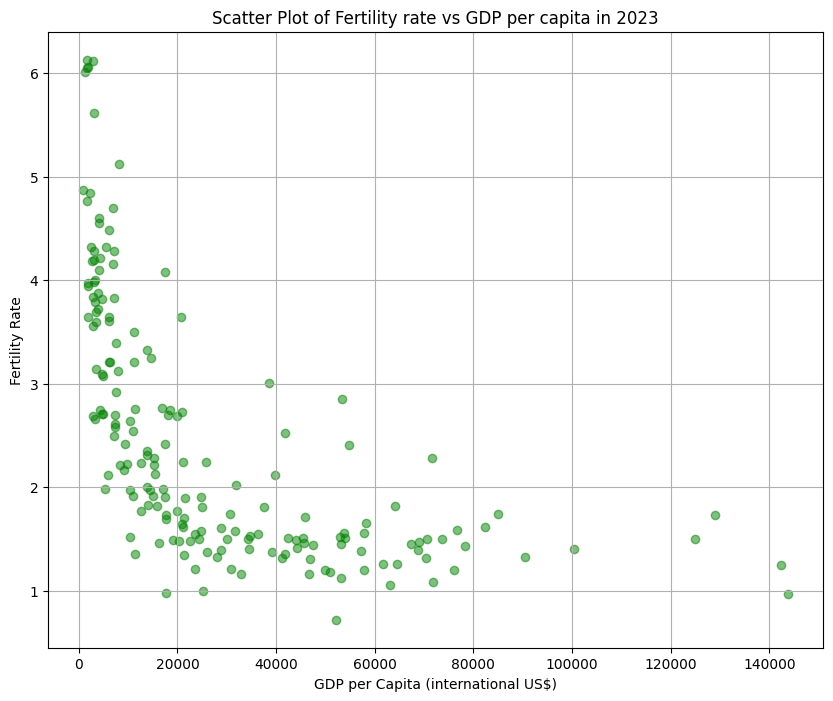

In [100]:
plt.figure(figsize=(10, 8)) #Size of the figure

#scatter plot for the relationship between GDP Per capita and Fertility rate in the year 2023
plt.scatter(fertility_gdp['GDP_per_capita_2023'], fertility_gdp['Fertility_Rate_2023'],alpha=0.5, color='green')

plt.title('Scatter Plot of Fertility rate vs GDP per capita in 2023')
plt.xlabel('GDP per Capita (international US$)')
plt.ylabel('Fertility Rate')
plt.grid(True)

plt.show()

Using Spearman's rank correlation to determine the correlation of the data points.

Spearman's Rank Correlation is less sensitive to outliers and non-linear relationships such as the one displayed above. These two characteristics of Spearman's Rank Correlation makes it the best method to determine the correlation of an exponentially decreasing set of data points.

In [101]:
#use spearman's Rank correlation to determine the correlation of the data
spearman_correlation = fertility_gdp['GDP_per_capita_2023'].corr(fertility_gdp['Fertility_Rate_2023'], method='spearman')

print(f"Spearman's Rank Correlation Coefficient: {spearman_correlation}")

Spearman's Rank Correlation Coefficient: -0.8202417647447623


A Spearman's correlation value of -0.82 means as one value increases (GDP per capita), the other decreases.

The magnitude of the correlation implies that the relationship between the two variables is very strong.

# Question 6

In [102]:
hpi_data = pd.read_excel('./Data-Files/hpi-data-2016.xlsx') #read the excel file with th HPI data
hpi_data.head()

,HPI Rank,Country,Region,Life \nExpectancy (years),Wellbeing\n(0-10),Inequality of outcomes,Ecological Footprint\n(gha/capita),Happy Planet Index
0,1,Costa Rica,Americas,79.076,7.30,0.145568,2.84000,44.714071
1,2,Mexico,Americas,76.411,7.30,0.187699,2.89000,40.697292
2,3,Colombia,Americas,73.673,6.40,0.235044,1.87000,40.695011
3,4,Vanuatu,Asia Pacific,71.341,6.47,0.223332,1.86262,40.570099
4,5,Vietnam,Asia Pacific,75.477,5.50,0.185921,1.65000,40.307589


In [103]:
hpi_data = hpi_data[['Country', 'HPI Rank']] #keep only the relevant columns
hpi_data.head()

,Country,HPI Rank
0,Costa Rica,1
1,Mexico,2
2,Colombia,3
3,Vanuatu,4
4,Vietnam,5


In [104]:
cpi_data = pd.read_excel('./Data-Files/CPI2016_Results.xlsx', sheet_name='CPI2016_FINAL_16Jan') #read the CPI data excel sheet 
cpi_data.head()

c:\Users\mitch\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Country,CPI2016,Rank,Region,WB Code,World Bank CPIA,World Economic Forum EOS,Global Insight Country Risk Ratings,Bertelsmann Foundation Transformation Index,African Development Bank CPIA,...,Std Error 2016,Lower CI,Upper CI,Min,Max,OECD,G20,BRICS,EU,Arab states
0,New Zealand,90,1,AP,NZL,NaN,90.0,83,NaN,NaN,...,2.56,86,94,79,99,y,NaN,NaN,NaN,NaN
1,Denmark,90,1,WE/EU,DNK,NaN,85.0,83,NaN,NaN,...,2.46,86,94,83,99,y,NaN,NaN,y,NaN
2,Finland,89,3,WE/EU,FIN,NaN,91.0,83,NaN,NaN,...,1.46,87,92,83,94,y,NaN,NaN,y,NaN
3,Sweden,88,4,WE/EU,SWE,NaN,86.0,83,NaN,NaN,...,1.33,85,90,83,93,y,NaN,NaN,y,NaN
4,Switzerland,86,5,WE/EU,CHE,NaN,80.0,83,NaN,NaN,...,1.57,83,89,80,90,y,NaN,NaN,NaN,NaN


In [105]:
cpi_data = cpi_data[['Country', 'Rank']] #remain with only the relevant fields
cpi_data.head()

,Country,Rank
0,New Zealand,1
1,Denmark,1
2,Finland,3
3,Sweden,4
4,Switzerland,5


In [106]:
cpi_hpi_df = pd.merge(cpi_data, hpi_data, on='Country', how='inner') #merge the CPI rank data set with the HPI rank dataset
cpi_hpi_df

,Country,Rank,HPI Rank
0,New Zealand,1,38
1,Denmark,1,32
2,Finland,3,37
3,Sweden,4,61
4,Switzerland,5,24
...,...,...,...
127,Venezuela,166,29
128,Iraq,166,67
129,Afghanistan,169,110
130,Yemen,170,94


#### Handling missing data

We need to first determine if there is any missing data after merging the datasets

In [107]:
cpi_missing_data = cpi_hpi_df['Rank'].isna().sum()
hpi_missing_data = cpi_hpi_df['HPI Rank'].isna().sum()

print(f"Number of missing values in CPI 2016 Rank: {cpi_missing_data}")
print(f"Number of missing values in HPI Rank: {hpi_missing_data}")

Number of missing values in CPI 2016 Rank: 0
Number of missing values in HPI Rank: 0


There are no missing data points in either column. We can now proceed to plot the scatter plot

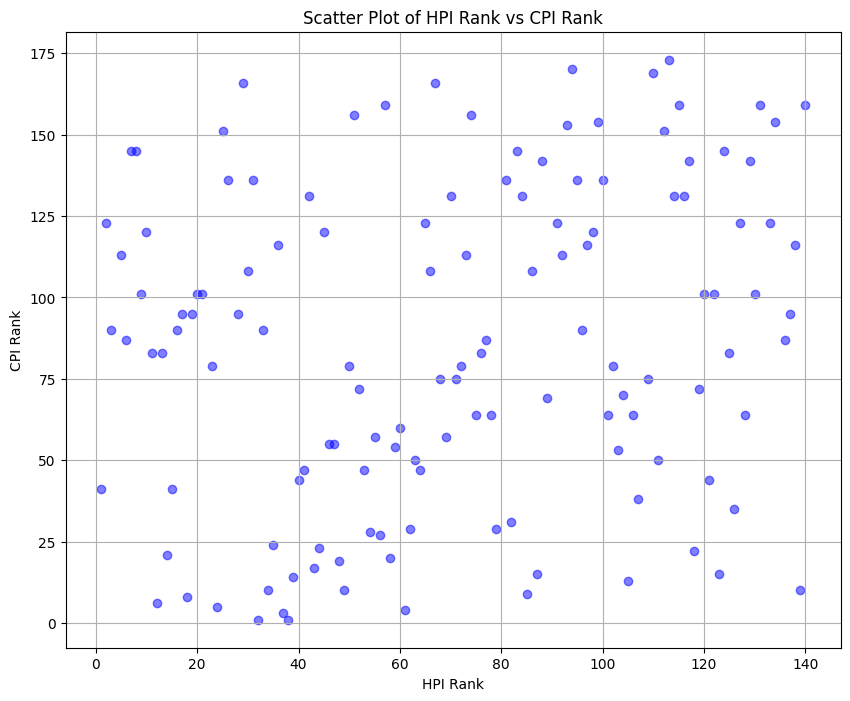

In [108]:
plt.figure(figsize=(10, 8)) #Size of the figure

#scatter plot for the relationship HPI Rank and CPI Rank
plt.scatter(cpi_hpi_df['HPI Rank'], cpi_hpi_df['Rank'],alpha=0.5, color='blue')

plt.title('Scatter Plot of HPI Rank vs CPI Rank')
plt.xlabel('HPI Rank')
plt.ylabel('CPI Rank')
plt.grid(True)

plt.show()

From the scatter plot, There is no clear or obvious relationship between the HPI Rank and the CPI rank.

The scatter plot is very sparse with data points being distributed evenly on the scatter plot.

**Conclusion: No Obvious relationship observed**